**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from joblib import dump, load
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
df = pd.read_csv(r'D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv')

In [3]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Dataset Preprocessing**

In [4]:
df = df.drop(columns=['Stroke Risk (%)'])

In [5]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [6]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [7]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [8]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Resampling with SMOTE

In [10]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [24]:
import time

In [26]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

start = time.time()
rf.fit(X_train, y_train)
print(f"Single fit took: {time.time() - start} seconds")

Single fit took: 0.9368317127227783 seconds


In [21]:
y_pred = rf.predict(X_test)

**Evaluation**

In [22]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print()

Accuracy: 0.9545

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4892
           1       0.96      0.97      0.97      9108

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


Confusion Matrix:
[[4569  323]
 [ 314 8794]]



**Hyper Parameter Tuning**

In [27]:
from joblib import parallel_backend
from tqdm.auto import tqdm

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5),
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# with parallel_backend("loky"):
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2240 candidates, totalling 11200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=1)

In [31]:
print(f"Best Params:\n{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Estimator: {grid_search.best_estimator_}")

Best Params:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.9970637912847777
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=400)


In [36]:
best_params = grid_search.best_params_
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
best_min_leaf = best_params['min_samples_leaf']
best_min_split = best_params['min_samples_split']
best_n_estimators = best_params['n_estimators']

**Retraining with Optimal Parameters**

In [37]:
# Initiate nya bisa pipeline gini,
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier(
        criterion = best_criterion,
        max_depth = best_max_depth,
        min_samples_leaf = best_min_leaf,
        min_samples_split = best_min_split,
        n_estimators = best_n_estimators,
        n_jobs = -1
    ))
])

In [38]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=400, n_jobs=-1))])

In [39]:
y_pred_2 = rf_pipe.predict(X_test)

**Optimized Model Performance**

In [40]:
print("===== Optimalized Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print()

===== Optimalized Model Performance =====
Accuracy: 0.9547142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4892
           1       0.96      0.97      0.97      9108

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


Confusion Matrix:
[[4567  325]
 [ 309 8799]]



**Saving Model**

In [42]:
# Saving Model
dump(rf_pipe, 'model.joblib')

['model.joblib']

In [13]:
# Loading Saved Model
loaded_model = load('model.joblib')
loaded_scaler = load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

In [14]:
print(y_pred_loaded_model)

[1 0 0 ... 0 0 0]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred_loaded_model))
print(recall_score(y_test, y_pred_loaded_model))
print(f1_score(y_test, y_pred_loaded_model))
print(accuracy_score(y_test, y_pred_loaded_model))

0.9643796580447173
0.9660737812911726
0.9652259763053971
0.9547142857142857


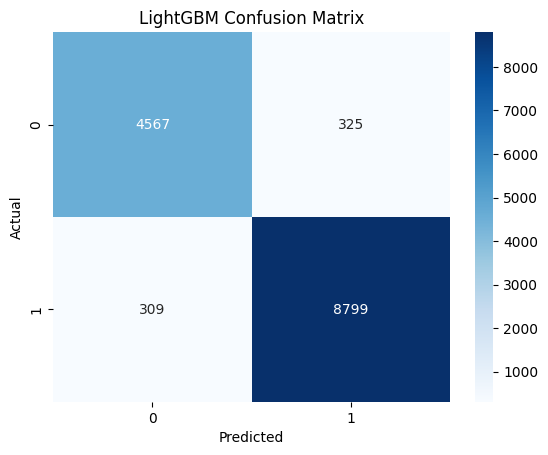

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()